In [1]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
consumer_key = "8tcSQzvzZLRA0ltJZ3XE4siMy"
consumer_secret = "wyiLbp1hQ5gYzANlPnlpr1SHDsK9ry8OquO1U348kWJQCBkyEp"

# Access token and secret given by twitter with API
access_token = "3163679389-Cf4OiF6Qs2UFfeXg7ACwSkJMNEircIfUrhJXUKg"
access_secret = "7Eld3oQpXgCMA01SBoTGJBlsJLhLhnoJ7SryXn7irGHVX"

In [4]:
import tweepy

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [6]:
api = tweepy.API(auth)

In [90]:
# posts = api.user_timeline(screen_name = 'bjp', count=100, language ='en', tweet_mode ='extended')
posts = api.search('java',count=10000,language='english')

In [91]:
df = pd.DataFrame([ post.text for post in posts ] , columns=['Tweets'])
df


,Tweets
0,RT @JavaAtMicrosoft: .@AdoptOpenJDK builds of ...
1,hey guys\n\nreply w/ ur mc username if u have ...
2,RT @fahfahsnpth: รวม Brush ที่เราใช้บ่อยใน #pr...
3,RT @bukkan817: 英語の資料数百枚とlinux入ったPC渡されて、誰もいないサー...
4,@ValverdeDane Progra III y IV son en Java... w...
...,...
95,RT @NapVeg: post malone: g wagon g wagon g wag...
96,RT @pak_aims: Convolutional Network Demo from ...
97,RT @pak_aims: Convolutional Network Demo from ...
98,RT @pak_aims: Convolutional Network Demo from ...


In [92]:
def getpolarity(text):
    return TextBlob(text).sentiment.polarity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    return text

In [93]:
df['Tweets']=df['Tweets'].apply(cleantext)
df['Polarity'] = df['Tweets'].apply(getpolarity)
df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df

,Tweets,Polarity,Subjectivity
0,: . builds of Java8 are now the default OpenJD...,0.0,0.0
1,hey guys\n\nreply w/ ur mc username if u have ...,0.0,0.0
2,: รวม Brush ที่เราใช้บ่อยใน procreate \nแล้วถ้...,0.0,0.0
3,: 英語の資料数百枚とlinux入ったPC渡されて、誰もいないサーバールームに案内されて、こ...,0.0,0.0
4,Progra III y IV son en Java... wait for it🥴😂❤️,0.0,0.0
...,...,...,...
95,: post malone: g wagon g wagon g wagon g wagon...,0.0,0.0
96,_aims: Convolutional Network Demo from 1993:\n...,0.0,0.0
97,_aims: Convolutional Network Demo from 1993:\n...,0.0,0.0
98,_aims: Convolutional Network Demo from 1993:\n...,0.0,0.0


(-0.5, 499.5, 299.5, -0.5)

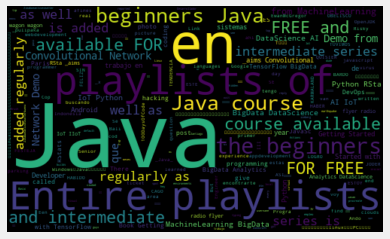

In [94]:
allwords = ''.join([twts for twts in df['Tweets'] ] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size= 119).generate(allwords)
plt.imshow(wordCloud, interpolation ='bilinear')
plt.axis('off')

In [95]:
def score(point):
    if point<0:
        return 'Negative'
    if point ==0:
        return 'Neutral'
    else:
        return 'Positive'

In [96]:
df["Analysis"] = df['Polarity'].apply(score)
df

,Tweets,Polarity,Subjectivity,Analysis
0,: . builds of Java8 are now the default OpenJD...,0.0,0.0,Neutral
1,hey guys\n\nreply w/ ur mc username if u have ...,0.0,0.0,Neutral
2,: รวม Brush ที่เราใช้บ่อยใน procreate \nแล้วถ้...,0.0,0.0,Neutral
3,: 英語の資料数百枚とlinux入ったPC渡されて、誰もいないサーバールームに案内されて、こ...,0.0,0.0,Neutral
4,Progra III y IV son en Java... wait for it🥴😂❤️,0.0,0.0,Neutral
...,...,...,...,...
95,: post malone: g wagon g wagon g wagon g wagon...,0.0,0.0,Neutral
96,_aims: Convolutional Network Demo from 1993:\n...,0.0,0.0,Neutral
97,_aims: Convolutional Network Demo from 1993:\n...,0.0,0.0,Neutral
98,_aims: Convolutional Network Demo from 1993:\n...,0.0,0.0,Neutral


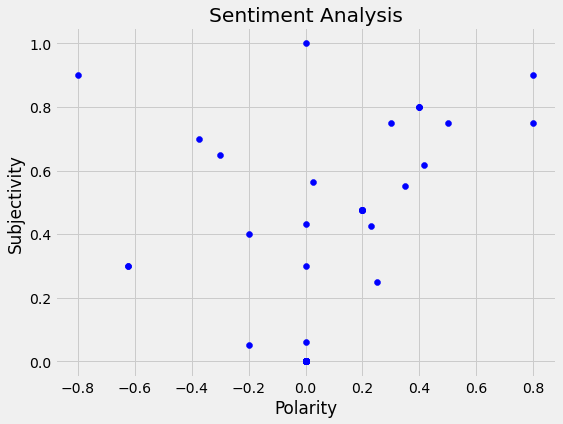

In [97]:
plt.figure(figsize =(8,6))
for i in range(df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [98]:
ptweets = df[df.Analysis=='Positive']
positive_percentage = (ptweets.shape[0]/df.shape[0])*100
positive_percentage

19.0

In [99]:
ntweets = df[df.Analysis =='Negative']
negative_percentage = (ntweets.shape[0]/df.shape[0])*100
negative_percentage

7.000000000000001

In [100]:
nutweets = df[df.Analysis =='Neutral']
neutral_percentage = (nutweets.shape[0]/df.shape[0])*100
neutral_percentage

74.0

In [101]:
df['Analysis'].value_counts()

Neutral     74
Positive    19
Negative     7
Name: Analysis, dtype: int64

<AxesSubplot:title={'center':'Sentiment Analysis'}, xlabel='Sentiments', ylabel='Analysis'>

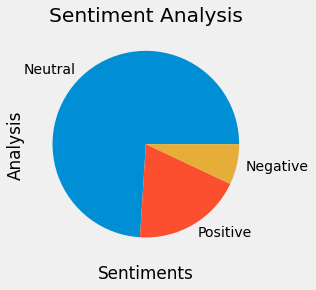

In [102]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')